# A Tour through the Visualization Zoo

**Authors - Cibaca Pramod Khandelwal , Shubham Goyal , Nik Bear Brown**



# Table of Contents

1. Introduction to Visualization Zoo
2. Time Series Data
   * Index Charts
   * Stacked graphs
   * Small Multiples
   * Horizon graphs
3. Statistical Distributions
   * Stem and Leaf Plots
   * Q-Q plots
   * SPLOM (Scatter Plot Matrix)
   * Parallel Coordinates
4. Maps
   * Flow Maps
   * Choropleth Maps
   * Graduated Symbol Maps
   * Cartograms
5. Hierarchies
   * Node-link Diagrams
   * Adjacency Diagrams
   * Enclosure Diagrams
6. Networks
   * Force-directed Layouts
   * Arc Diagrams
   * Matrix Views
8. References
9. License

# 1. Introduction to Visualization Zoo
   * ## What is Visualization Zoo?
     
     The term *Visualization Zoo* was introduced in the ACM paper published in the year 2010 by Standford Professor Jeffrey Heer, and his students Michael Bostock, and Vadim Ogievetsky.

     The goal of visualization is to help you understand your data by leveraging the highly-tuned abilities of the human visual system to recognize patterns, spot trends, and identify outliers.

     Creating a visualization requires a number of nuanced judgments. One must determine
     * which questions to ask 
     * identify the appropriate data 
     * select effective visual encodings to map data values to graphical features such as position, size, shape, and color
     
     A visualization zoo provides a number of techniques for visualizing and interacting with diverse data sets.In many situations, simple data graphics will not only suffice, they may also be preferable. Here we focus on a few of the more sophisticated and unusual techniques that deal with complex data sets. 
![Image1](https://drive.google.com/uc?id=1QVDajyNdkpHh7kKWTCuas-Ts2pFzT6HS)


   * ## Importance of Visualization
      ![Image2](https://drive.google.com/uc?id=1DeFF4p_EHn6tH8EiKl86W3RO2J9SF2NL)
   * ## Dataset used for the analysis
        In this articles we cover some of the more exotic and practically useful forms of visual data representation, starting with one of the most common, time-series data; continuing on to statistical data and maps; and then completing the tour with hierarchies and networks over a range of dataset. 
        1. Time-series Dataset **(Add examples and links to access the data)**
        2. Statistical dataset

# 2. Time Series Data

In this section we'll explore various types of charts used to visualize time series data and how it adds value in data interpretation. For easier interpretability we're using time based stocks data taken from Yahoo Finance website - https://finance.yahoo.com/

In [ ]:
#installing yahoo finance package, it is an already available library which makes the data pull seemless
! pip install yfinance

In [ ]:
import yfinance as yf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly 
import datetime 
from ipywidgets import widgets as wg
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

In [ ]:
# In this step we are pulling data for META,Amazon, Berkshire hathway class A within the defined time range
tickers = ["META", "AMZN", "BRK-A"]

df = yf.download(
        tickers=tickers,
        period="3y",
        interval="1wk",
        group_by="column")
        
df.head(5)

[*********************100%***********************]  3 of 3 completed


Adj Close                             Close            \
                  AMZN     BRK-A        META        AMZN     BRK-A   
Date                                                                 
2020-02-10  106.743500  340224.0  214.179993  106.743500  340224.0   
2020-02-17  104.798500  343449.0  210.179993  104.798500  343449.0   
2020-02-24   94.187500  309096.0  192.470001   94.187500  309096.0   
2020-03-02   95.054497  310894.0  181.089996   95.054497  310894.0   
2020-03-09   89.250000  289000.0  170.279999   89.250000  289000.0   

                              High                               Low  \
                  META        AMZN     BRK-A        META        AMZN   
Date                                                                   
2020-02-10  214.179993  109.297501  343146.0  214.929993  104.248001   
2020-02-17  210.179993  109.254997  344975.0  218.770004  104.400002   
2020-02-24  192.470001  101.964996  336163.0  203.649994   90.556503   
2020-03-02  181.089996   99.816498  327937.0  197.240005   93.474998   
2020-03-09  170.279999   94.713501  304199.0  178.289993   83.750000   

                                        Open                           Volume  \
               BRK-A        META        AMZN     BRK-A        META       AMZN   
Date                                                                            
2020-02-10  338000.0  206.509995  104.250504  340904.0  211.520004  395490000   
2020-02-17  338000.0  208.830002  106.250999  340224.0  213.550003  265688000   
2020-02-24  300750.0  181.820007  100.158997  335000.0  201.800003  712314000   
2020-03-02  304767.0  176.259995   95.324501  314000.0  194.029999  581818000   
2020-03-09  266800.0  154.339996   88.693001  292300.0  169.600006  814544000   

                             
           BRK-A       META  
Date                         
2020-02-10  1000   76839200  
2020-02-17  1000   54945800  
2020-02-24  2900  115289600  
2020-03-02  2200  119888600  
2020-03-09  5400  153135600

In [ ]:
df = df.filter(regex="Adj Close")
df = df.dropna()
df.head(5)

Adj Close                      
                  AMZN     BRK-A        META
Date                                        
2020-02-10  106.743500  340224.0  214.179993
2020-02-17  104.798500  343449.0  210.179993
2020-02-24   94.187500  309096.0  192.470001
2020-03-02   95.054497  310894.0  181.089996
2020-03-09   89.250000  289000.0  170.279999

In [ ]:
df.shape

(157, 3)

2a. Index Charts - 

In practice of time series data intrepretation, analyzing the relative difference between two data points generally adds more value than just the raw the data points. This is where Index charts help in which we create relative charts using normalization 

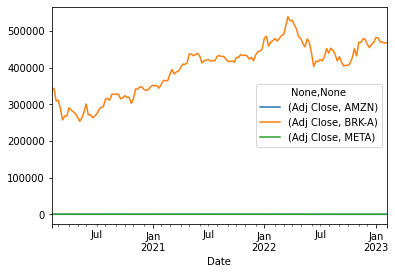

In [ ]:
# For eg. If we see the plot of the three stocks because of the large difference in range its hard to draw a comparison

df.plot()

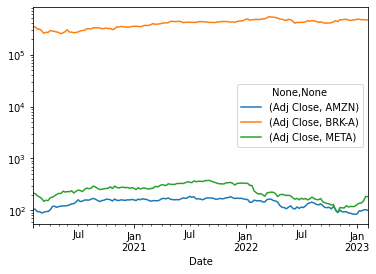

In [ ]:
# we can try using log scale to see if that makes a difference and is easier to interpret
df.plot(logy=True)


In the above charts we can see that even with log scale its hard to draw a clear comparison between the stocks. With indexing, we take a reference date and value of the stock on that day and divide all the other date values with it. Given we're comparing multiple stocks, each stock will be divided by its respective reference value. We can also make the variation for the reference value to start from zero by multiplying the divided value by 100 to make it in percentage and subtracting 100 from that.

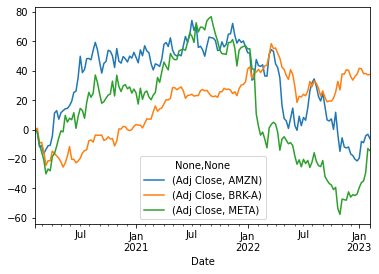

In [ ]:
# use the first date as index 
reference_value = df.iloc[0]

# dividing by the series divides each column by the 
# corresponding element in the series
tmp_df = df.div(reference_value) * 100 - 100

tmp_df.plot()

prepared_df = df.copy()

This chart looks much better and we can easily draw a comparitive analysis between the stocks. We can observe a stable growth in BRK-A as compared to other the two stocks

In [ ]:
#Creating a function for indexing

def create_indexed_columns(date, df, top_level_name=""):
    """Returns indexed columns for given dataframe"""

    # find index of the date that is closest to our reference date
    closest_date_index = df.index.get_loc(date, method="nearest")

    # get the values in the initial columns for the reference date 
    reference_values = df.iloc[closest_date_index]['Adj Close']

    # divide initial columns by values at ref. date and store in intermediate df
    inter_df = df['Adj Close'].div(reference_values)*100 - 100

    # create a multindex for the intermediate df using the date as top-level index
    closest_date = df.index[closest_date_index]
    inter_df.columns = pd.MultiIndex.from_product(
                    [[top_level_name if top_level_name else str(closest_date)], inter_df.columns])
    
    return inter_df, closest_date

In [ ]:
inter_df,df_index= create_indexed_columns('2020-03-01',df)

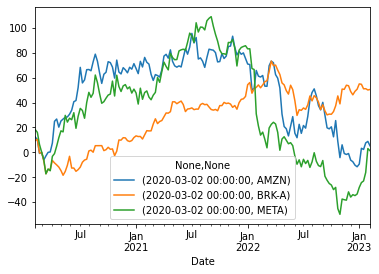

In [ ]:
inter_df.plot()

Going further we'll be using plotly library to create better interactive charts. 

### Multi-Index Charts

Another vairation of index charts is multi-index charts, in which we can use 

*   List item
*   List item

multiple reference dates as indexes to highlight the importance and variations a particular set of dates caused to the stock's prices

In [ ]:
ref_dict = {
    "Event1": "2020-02-14",
    "Event2": "2021-12-01"
}

In [ ]:
# tmp_dict for storing updated reference date dict entries
tmp_dict = {}
fixed_df = df.copy()

for ref_name, ref_date in ref_dict.items():
    # create intermediate df for reference date
    inter_df, closest_date = create_indexed_columns(ref_date, fixed_df, top_level_name=ref_name)
    
    fixed_df = fixed_df.join(inter_df)
    tmp_dict.update(
        {ref_name: dict(
            initial_date=ref_name,
            closest_date=closest_date)}
    )

# update values in original dict
ref_dict.update(tmp_dict)

In [ ]:
ref_date_fig = go.Figure()

# loop over reference dates
for ref_name in ref_dict.keys():
    # loop over tickers for reference date
    for ticker in fixed_df[ref_name].columns:
        ref_date_fig.add_scatter(
            x=fixed_df.index,
            y=fixed_df[ref_name, ticker],
            name=ticker + '_' + ref_name, 
            meta=dict(reference_date=ref_name)
        )


ref_date_fig.show()

In [ ]:
ref_dict.keys()

dict_keys(['Event1', 'Event2'])

## 2b. Stacked Charts

The stacked time series graph is a variant of the time series graph. The stacked series offers an alternative style; a fill beneath the slope of each line allows for a different visual emphasis. Each data point is plotted along a chronological axis, ideal for observing trends over time. This type of graph (sometimes called a stream graph) depicts aggregate patterns and often supports drill-down into a subset of individual series

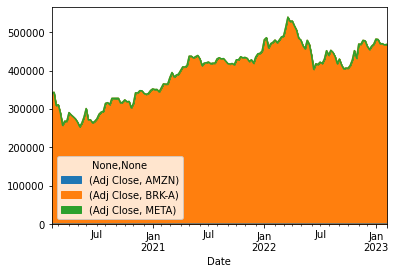

In [ ]:
df.plot.area()

We can segregate the charts as well to have a better look at the area under a particular stock. In the above chart, because of the huge difference in the scale of the stocks other charts like AMZN & META got hidden behind BRK-A

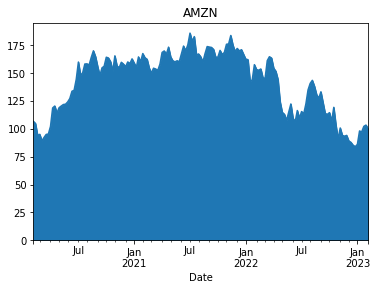

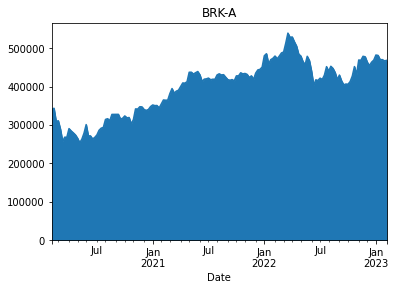

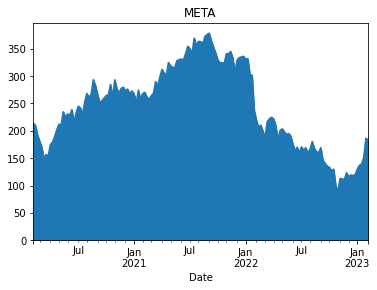

In [ ]:
for column in df['Adj Close'].columns:
  plt.figure()
  df['Adj Close'][column].plot.area()
  plt.title(column)
  plt.show()
  print(" ")

Other topics to be updated

# 3. Statistical Distribution

This section is completed in the google colab notebook - https://drive.google.com/file/d/1C86BP65hp2oV_yieSdiqOERdhtm20XmC/view?usp=sharing 

# 5. hierarchical Diagrams

This section is completed in the google colab notebook - https://colab.research.google.com/drive/1sz5IXmzDiUHutRaWMCZFqXbbcSorcFju?usp=share_link

## License  

All code in this notebook is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license.  https://creativecommons.org/licenses/by/3.0/us/

These licenses let people distribute, remix, tweak, and build upon the work, even commercially, as long as they give credit for the original creation.

Copyright 2023 AI Skunks  https://github.com/aiskunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# New Section